# <span style="color:Purple">TReNDS  🅽🅴🆁🅾🅸🅼🅰🅶🅸🅽🅶  Visualization, Analysis and Evaluation ✔

## Multiscanner normative age and assessments prediction with brain function, structure, and connectivity.
In this competition, we will predict multiple assessments plus age from multimodal brain MRI features. Due to the complexity of the brain and differences between scanners, generalized approaches will be essential to effectively propel multimodal neuroimaging research forward. 
    
    
    

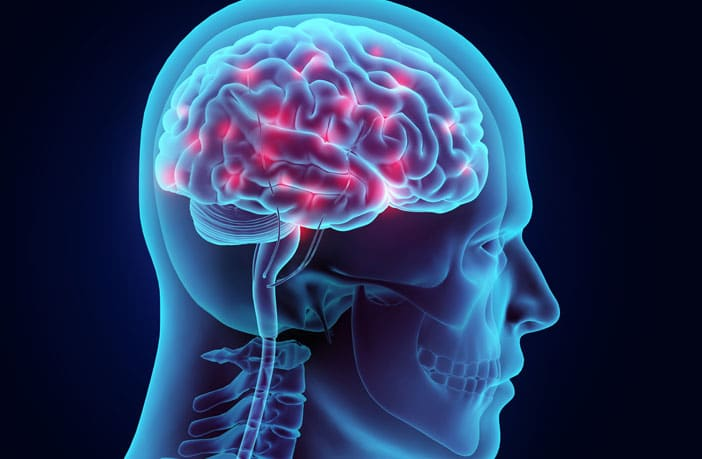

    
**<span style="color:Red">I have just started to working in this project, so it is on progress, I will update time by time**
### Please upvote this kernel if you like it  :-)

# Import Libraries

* **JoyPy** is a one-function Python package based on matplotlib + pandas with a single purpose.
* **Nilearn** is a Python module for fast and easy statistical learning on NeuroImaging data.
It leverages the scikit-learn Python toolbox for multivariate statistics with applications such as predictive modelling, classification, decoding, or connectivity analysis.
* **NiBabel** Read / write access to some common neuroimaging file formats.
* **HDF5** lets you store huge amounts of numerical data, and easily manipulate that data from NumPy.


In [1]:
!pip install joypy --progress-bar off

In [2]:
import os
import random
import seaborn as sns
import cv2

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import PIL

import nilearn as nl
import nilearn.plotting as nlplt
import nibabel as nib
import h5py
import plotly.graph_objs as go
from IPython.display import Image, display
import joypy
import warnings
warnings.filterwarnings("ignore")

# Check dataset list and type

In [3]:
os.listdir('/kaggle/input/trends-assessment-prediction/')

['sample_submission.csv',
 'fMRI_mask.nii',
 'loading.csv',
 'ICN_numbers.csv',
 'reveal_ID_site2.csv',
 'fMRI_test',
 'train_scores.csv',
 'fMRI_train',
 'fnc.csv']

# Load Dataset

In [4]:
BASE_PATH = '../input/trends-assessment-prediction'

train_data_dir = f'{BASE_PATH}/fMRI_train'
test_data_dir = f'{BASE_PATH}/fMRI_test'


In [5]:
loading_data = pd.read_csv(f'{BASE_PATH}/loading.csv')
train_data = pd.read_csv(f'{BASE_PATH}/train_scores.csv')
sample_submission = pd.read_csv(f'{BASE_PATH}/sample_submission.csv')
fnc_df = pd.read_csv("../input/trends-assessment-prediction/fnc.csv")


In [6]:
loading_data.head()

Id     IC_01     IC_07     IC_05     IC_16     IC_26     IC_06  \
0  10001  0.006070  0.014466  0.004136  0.000658 -0.002742  0.005033   
1  10002  0.009087  0.009291  0.007049 -0.002076 -0.002227  0.004605   
2  10003  0.008151  0.014684  0.010444 -0.005293 -0.002913  0.015042   
3  10004  0.004675  0.000957  0.006154 -0.000429 -0.001222  0.011755   
4  10005 -0.000398  0.006878  0.009051  0.000369  0.000336  0.010679   

      IC_10     IC_09     IC_18  ...     IC_08     IC_03     IC_21     IC_28  \
0  0.016720  0.003484  0.001797  ...  0.018246  0.023711  0.009177 -0.013929   
1  0.012277  0.002946  0.004086  ...  0.014635  0.022556  0.012004 -0.011814   
2  0.017745  0.003930 -0.008021  ...  0.019565  0.030616  0.018184 -0.010469   
3  0.013010  0.000193  0.008075  ...  0.002658  0.022266  0.005956 -0.010595   
4  0.010352  0.003637  0.004180  ...  0.009702  0.017257  0.005454 -0.008591   

      IC_11     IC_20     IC_30     IC_22     IC_29     IC_14  
0  0.030696  0.010496  0.002892 -0.023235  0.022177  0.017192  
1  0.022479  0.005739  0.002880 -0.016609  0.025543  0.014524  
2  0.029799  0.015435  0.005211 -0.028882  0.031427  0.018164  
3  0.024078 -0.000319  0.005866 -0.015182  0.024476  0.014760  
4  0.019416  0.000786  0.002692 -0.019814  0.017105  0.013316  

[5 rows x 27 columns]

In [7]:
loading_data.shape

(11754, 27)

In [8]:
train_data.head()

Id        age  domain1_var1  domain1_var2  domain2_var1  domain2_var2
0  10001  57.436077     30.571975     62.553736     53.325130     51.427998
1  10002  59.580851     50.969456     67.470628     60.651856     58.311361
2  10004  71.413018     53.152498     58.012103     52.418389     62.536641
3  10005  66.532630           NaN           NaN     52.108977     69.993075
4  10007  38.617381     49.197021     65.674285     40.151376     34.096421

In [9]:
train_data.shape

(5877, 6)

In [10]:
total = train_data.isnull().sum()
percent = total/train_data.isnull().count()*100
missing_train_data= pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_train_data.head()

Total   Percent
Id                0  0.000000
age               0  0.000000
domain1_var1    438  7.452782
domain1_var2    438  7.452782
domain2_var1     39  0.663604

# Exploratory Data Analysis

In [11]:
def plot_bar(df, feature, title='', show_percent = False, size=2):
    f, ax = plt.subplots(1,1, figsize=(4*size,3*size))
    total = float(len(df))
    sns.barplot(np.round(df[feature].value_counts().index).astype(int), df[feature].value_counts().values, alpha=0.8, palette='Set2')

    plt.title(title)
    if show_percent:
        for p in ax.patches:
            height = p.get_height()
            ax.text(p.get_x()+p.get_width()/2.,
                    height + 3,
                    '{:1.2f}%'.format(100*height/total),
                    ha="center", rotation=45) 
    plt.xlabel(feature, fontsize=12, )
    plt.ylabel('Number of Occurrences', fontsize=12)
    plt.xticks(rotation=90)
    plt.show()

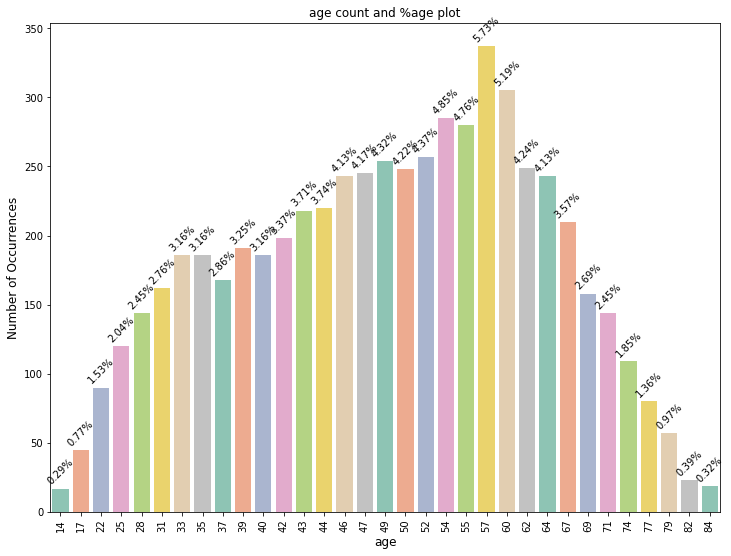

In [12]:
plot_bar(train_data, 'age', 'age count and %age plot', show_percent=True, size=3)

from the above plot we can understand Top 5 most frequent ages are 57, 60, 54, 55, 50.

# HeatMap

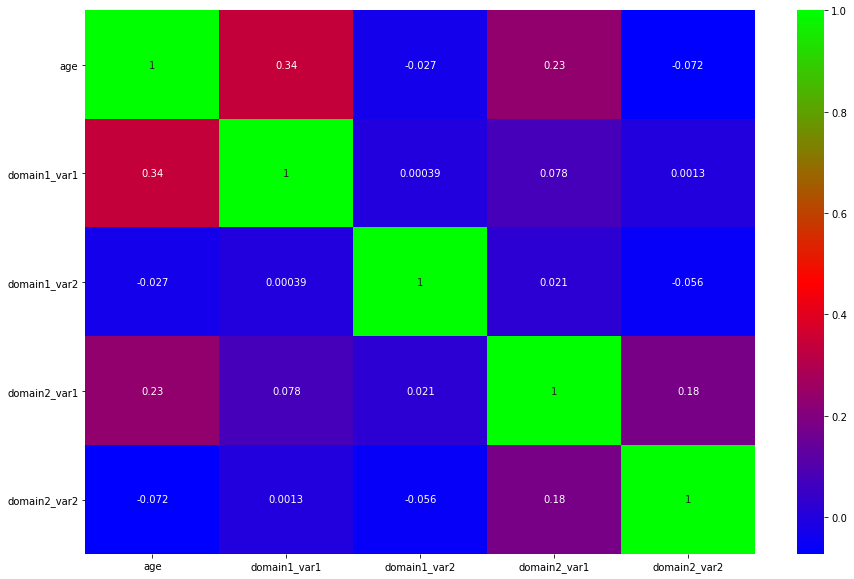

In [13]:
temp_data =  train_data.drop(['Id'], axis=1)
plt.figure(figsize = (15, 10))
sns.heatmap(temp_data.corr(), annot = True, cmap="brg")
plt.yticks(rotation=0) 
plt.show()

#### From the above heatmap we can see that Age and domain1_var1 corelated and significant, let's go forward.

## Let's make a heatmap of Loading Data

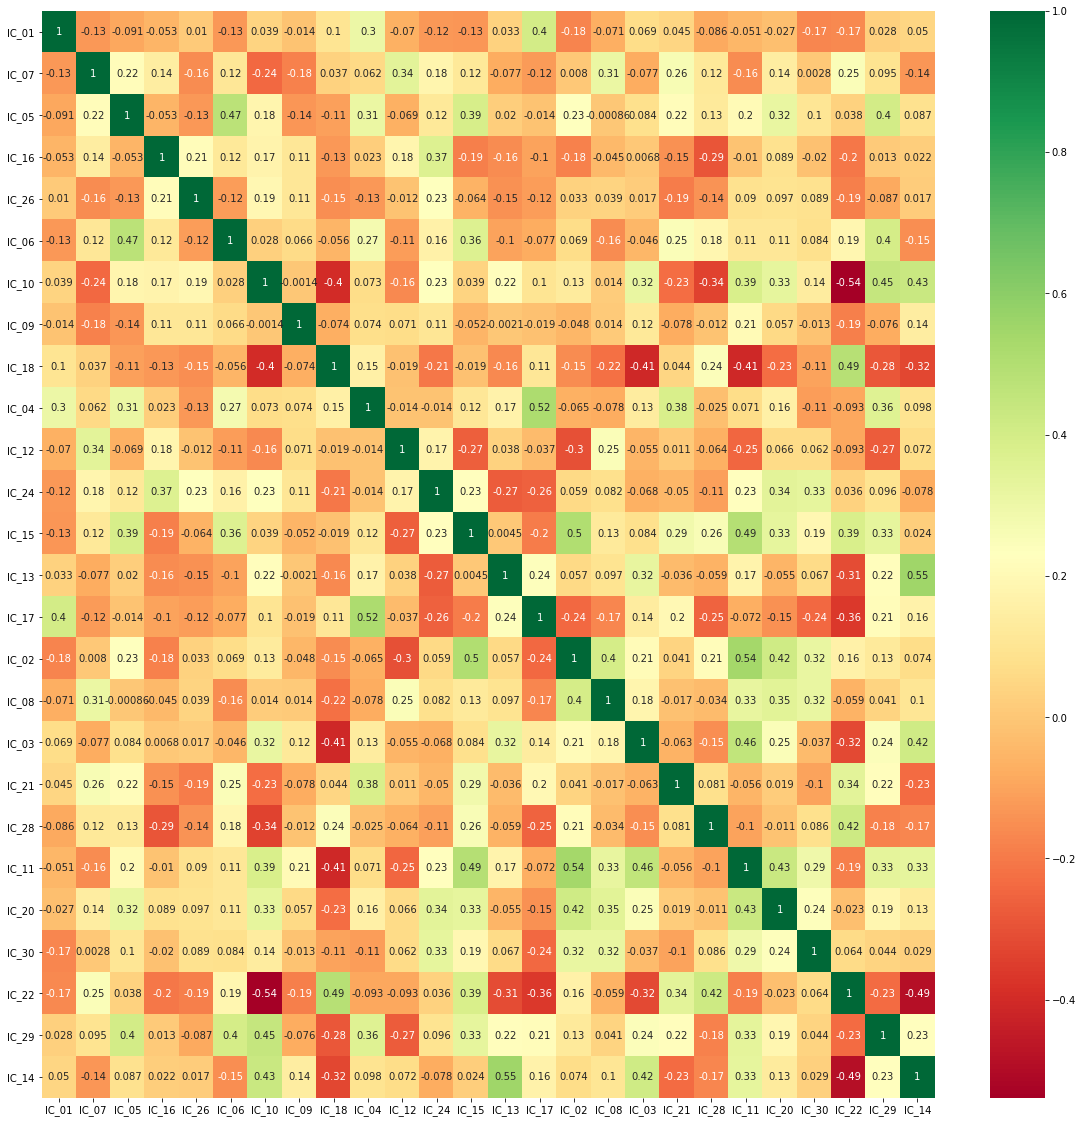

In [14]:
temp_data =  loading_data.drop(['Id'], axis=1)

plt.figure(figsize = (20, 20))
sns.heatmap(temp_data.corr(), annot = True, cmap="RdYlGn")
plt.yticks(rotation=0) 

plt.show()

IC_13, IC_14 having high co relation value here !

In [15]:
temp_data =  loading_data.drop(['Id'], axis=1)
# Create correlation matrix
correl = temp_data.corr().abs()

# Select upper triangle of correlation matrix
upper = correl.where(np.triu(np.ones(correl.shape), k=1).astype(np.bool))
# Find index of feature columns with correlation greater than 0.5
to_drop = [column for column in upper.columns if any(upper[column] > 0.5)]

print('Very high correlated features: ', to_drop)

Very high correlated features:  ['IC_17', 'IC_02', 'IC_11', 'IC_22', 'IC_14']


<Figure size 1440x900 with 0 Axes>

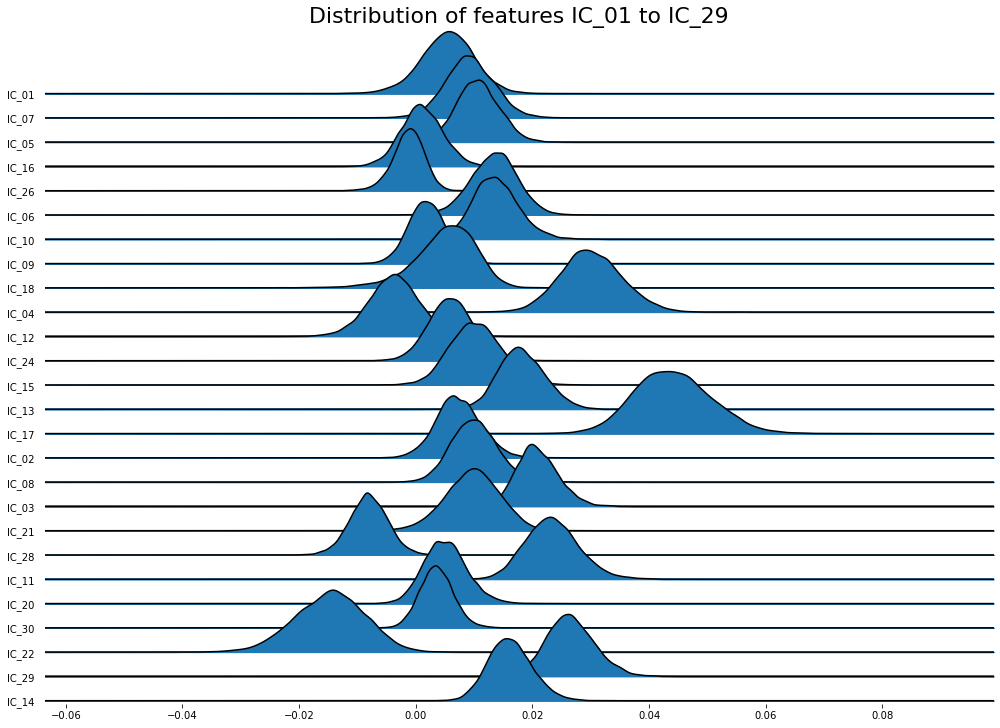

In [16]:
import joypy

targets= loading_data.columns[1:]


plt.figure(figsize=(16,10), dpi= 90)
fig, axes = joypy.joyplot(loading_data, column=list(targets), ylim='own', figsize=(14,10))

# Decoration
plt.title('Distribution of features IC_01 to IC_29', fontsize=22)
plt.show()

# Visualization using Nilearn

this portion is inspired by Soham Mukherjee's Kernal, adding the link of his kernal.

https://www.kaggle.com/soham1024/visualization-using-nilearn

In [17]:
!wget https://github.com/Chaogan-Yan/DPABI/raw/master/Templates/ch2better.nii

--2020-06-22 06:26:43--  https://github.com/Chaogan-Yan/DPABI/raw/master/Templates/ch2better.nii
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Chaogan-Yan/DPABI/master/Templates/ch2better.nii [following]
--2020-06-22 06:26:43--  https://raw.githubusercontent.com/Chaogan-Yan/DPABI/master/Templates/ch2better.nii
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35193272 (34M) [application/octet-stream]
Saving to: ‘ch2better.nii’

ch2better.nii       100%[===================>]  33.56M  42.3MB/s    in 0.8s    

2020-06-22 06:26:45 (42.3 MB/s) - ‘ch2better.nii’ saved [35193272/35193272]



DPABI is a toolbox for Data Preprocessing and Analysing  Brain Imaging; using ch2bettertemplate to visualize various dimesion, axis, gray matter of brain.

In [18]:
mask_filename = f'{BASE_PATH}/fMRI_mask.nii'
subject_filename = '../input/trends-assessment-prediction/fMRI_train/10015.mat'
smri_filename = 'ch2better.nii'
mask_niimg = nl.image.load_img(mask_filename)

In [19]:
def load_subject(filename, mask_niimg):
    subject_data = None
    with h5py.File(subject_filename, 'r') as f:
        subject_data = f['SM_feature'][()]
    # It's necessary to reorient the axes, since h5py flips axis order
    subject_data = np.moveaxis(subject_data, [0,1,2,3], [3,2,1,0])
    subject_niimg = nl.image.new_img_like(mask_niimg, subject_data, affine=mask_niimg.affine, copy_header=True)
    return subject_niimg
subject_niimg = load_subject(subject_filename, mask_niimg)
print("Image shape is %s" % (str(subject_niimg.shape)))
num_components = subject_niimg.shape[-1]
print("Detected {num_components} spatial maps".format(num_components=num_components))

Image shape is (53, 63, 52, 53)
Detected 53 spatial maps


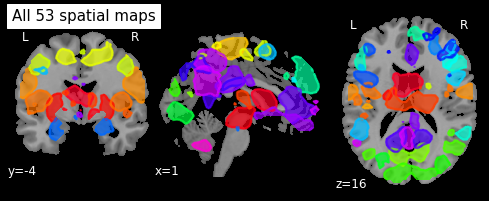

In [20]:
nlplt.plot_prob_atlas(subject_niimg, bg_img=smri_filename, view_type='filled_contours', draw_cross=False,title='All %d spatial maps' % num_components, threshold='auto')

# Individual Component Feautures of all 53

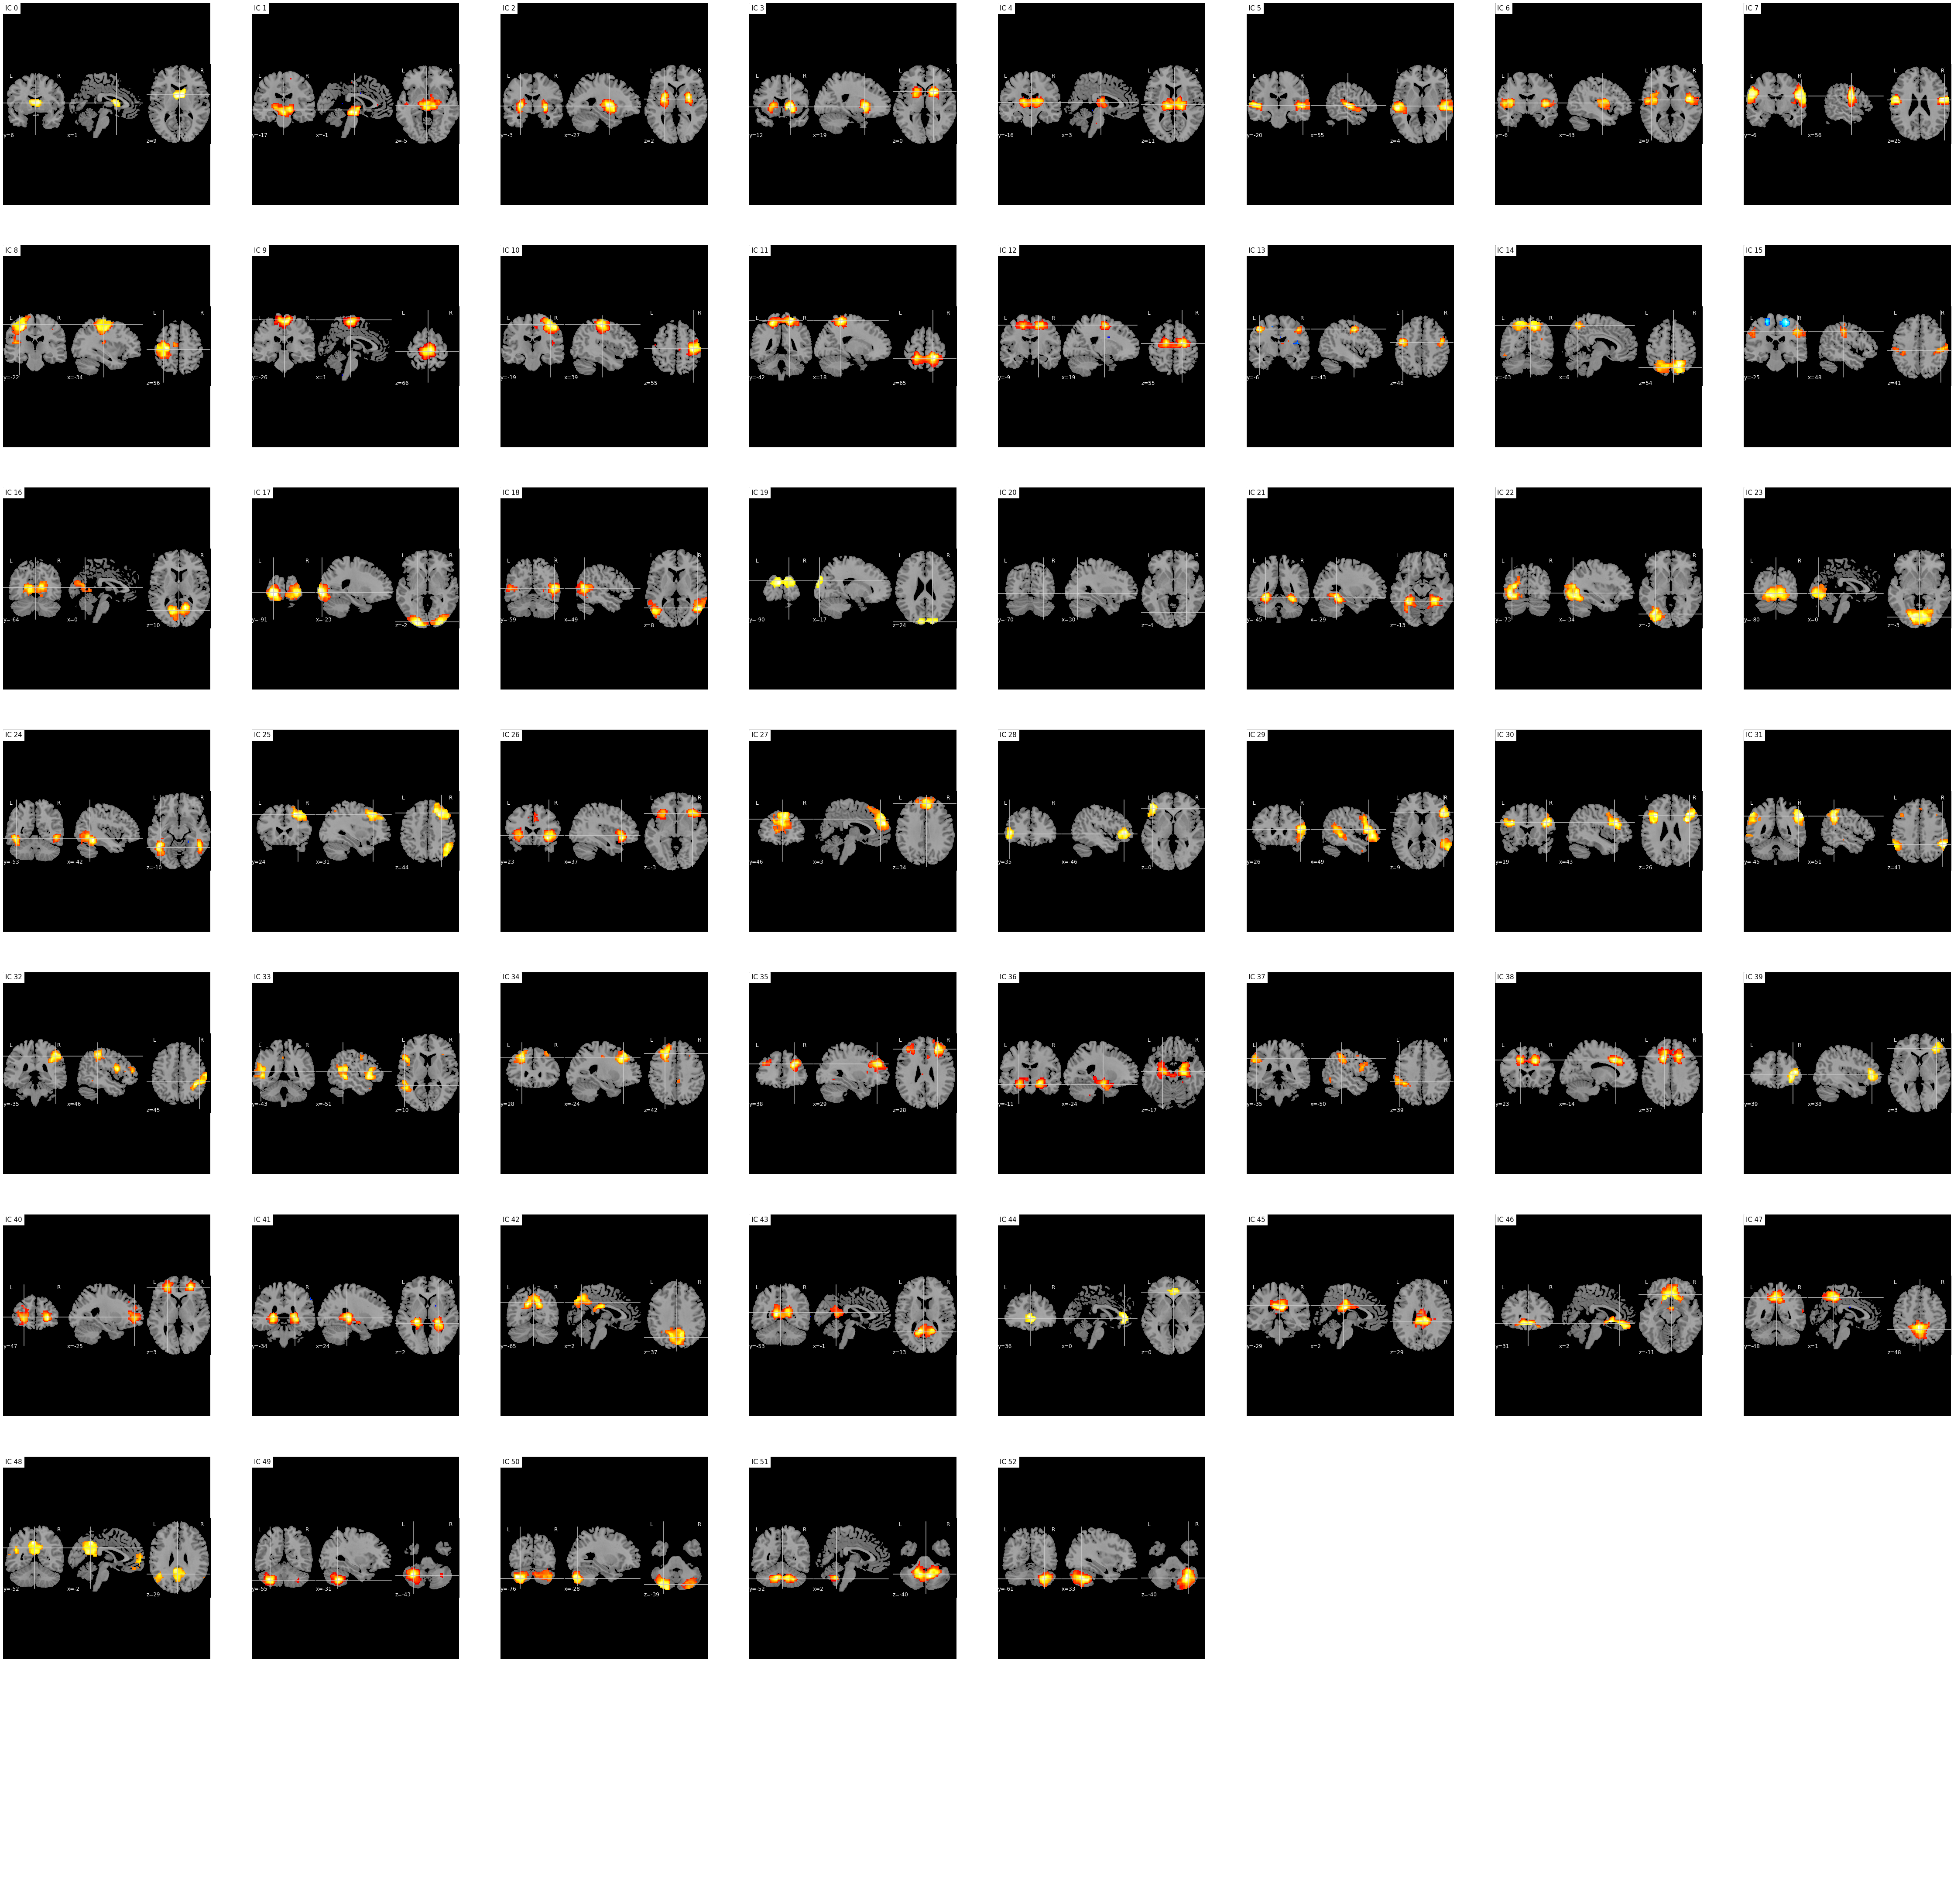

In [21]:
grid_size = int(np.ceil(np.sqrt(num_components)))
fig, axes = plt.subplots(grid_size, grid_size, figsize=(grid_size*10, grid_size*10))
[axi.set_axis_off() for axi in axes.ravel()]
row = -1
for i, cur_img in enumerate(nl.image.iter_img(subject_niimg)):
    col = i % grid_size
    if col == 0:
        row += 1
    nlplt.plot_stat_map(cur_img, bg_img=smri_filename, title="IC %d" % i, axes=axes[row, col], threshold=3, colorbar=False)
    

In [22]:
from nilearn import datasets

# haxby dataset to have EPI images and masks
haxby_dataset = datasets.fetch_haxby()

# print basic information on the dataset
print('First subject anatomical nifti image (3D) is at: %s' %
      haxby_dataset.anat[0])
print('First subject functional nifti image (4D) is at: %s' %
      haxby_dataset.func[0])  # 4D data

haxby_anat_filename = haxby_dataset.anat[0]
haxby_mask_filename = haxby_dataset.mask_vt[0]
haxby_func_filename = haxby_dataset.func[0]

# one motor contrast map from NeuroVault
motor_images = datasets.fetch_neurovault_motor_task()
stat_img = motor_images.images[0]


Dataset created in /root/nilearn_data/haxby2001



Downloaded 2969 of 2969 bytes (100.0%,    0.0s remaining) ...done. (2 seconds, 0 min)
Downloaded 408 of 408 bytes (100.0%,    0.0s remaining) ...done. (0 seconds, 0 min)


Downloaded 291168628 of 291168628 bytes (100.0%,    0.0s remaining) ...done. (3 seconds, 0 min)
Extracting data from /root/nilearn_data/haxby2001/f33ff337e914bf7fded743c7107979f9/subj2-2010.01.14.tar.gz..... done.


First subject anatomical nifti image (3D) is at: /root/nilearn_data/haxby2001/subj2/anat.nii.gz
First subject functional nifti image (4D) is at: /root/nilearn_data/haxby2001/subj2/bold.nii.gz

Dataset created in /root/nilearn_data/neurovault



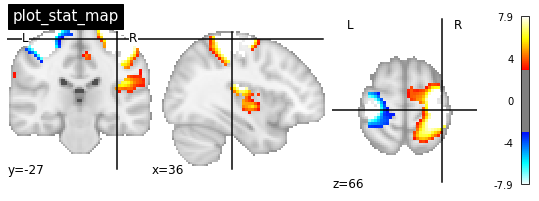

In [23]:
from nilearn import plotting

# Visualizing t-map image on EPI template with manual
# positioning of coordinates using cut_coords given as a list
plotting.plot_stat_map(stat_img,
                       threshold=3, title="plot_stat_map",
                       cut_coords=[36, -27, 66])

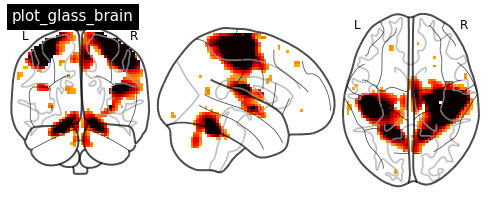

In [24]:
plotting.plot_glass_brain(stat_img, title='plot_glass_brain',
                          threshold=3)

# Brain Development Function

In [25]:
from nilearn import datasets

rest_dataset = datasets.fetch_development_fmri(n_subjects=20)
func_filenames = rest_dataset.func
confounds = rest_dataset.confounds


Dataset created in /root/nilearn_data/development_fmri


Dataset created in /root/nilearn_data/development_fmri/development_fmri



Downloaded 16041 of 16041 bytes (100.0%,    0.0s remaining) ...done. (1 seconds, 0 min)


Downloaded 68285 of 68285 bytes (100.0%,    0.0s remaining) ...done. (1 seconds, 0 min)


Downloaded 5642698 of 5642698 bytes (100.0%,    0.0s remaining) ...done. (1 seconds, 0 min)


Downloaded 67851 of 67851 bytes (100.0%,    0.0s remaining) ...done. (2 seconds, 0 min)


Downloaded 4946416 of 4946416 bytes (100.0%,    0.0s remaining) ...done. (1 seconds, 0 min)


Downloaded 69170 of 69170 bytes (100.0%,    0.0s remaining) ...done. (1 seconds, 0 min)


Downloaded 5875966 of 5875966 bytes (100.0%,    0.0s remaining) ...done. (1 seconds, 0 min)


Downloaded 68464 of 68464 bytes (100.0%,    0.0s remaining) ...done. (1 seconds, 0 min)


Downloaded 5845425 of 5845425 bytes (100.0%,    0.0s remaining) ...done. (1 seconds, 0 min)


Downloaded 68468 of 68468 bytes (100.0%,    0.0s remaining) ...done. (1 seconds, 0 min)


Downloaded 6293165 of 6293165 bytes (100.0%,    0.0s remaining) ...done. (1 seconds, 0 min)


Downloaded 68130 of 68130 bytes (100.0%,    0.0s remaining) ...done. (1 seconds, 0 min)


Downloaded 6136523 of 6136523 bytes (100.0%,    0.0s remaining) ...done. (1 seconds, 0 min)


Downloaded 68340 of 68340 bytes (100.0%,    0.0s remaining) ...done. (1 seconds, 0 min)


Downloaded 5837641 of 5837641 bytes (100.0%,    0.0s remaining) ...done. (1 seconds, 0 min)


Downloaded 71331 of 71331 bytes (100.0%,    0.0s remaining) ...done. (1 seconds, 0 min)


Downloaded 6118892 of 6118892 bytes (100.0%,    0.0s remaining) ...done. (1 seconds, 0 min)


Downloaded 68533 of 68533 bytes (100.0%,    0.0s remaining) ...done. (1 seconds, 0 min)


Downloaded 6453693 of 6453693 bytes (100.0%,    0.0s remaining) ...done. (1 seconds, 0 min)


Downloaded 68590 of 68590 bytes (100.0%,    0.0s remaining) ...done. (1 seconds, 0 min)


Downloaded 6176491 of 6176491 bytes (100.0%,    0.0s remaining) ...done. (1 seconds, 0 min)


Downloaded 68630 of 68630 bytes (100.0%,    0.0s remaining) ...done. (1 seconds, 0 min)


Downloaded 6225801 of 6225801 bytes (100.0%,    0.0s remaining) ...done. (2 seconds, 0 min)


Downloaded 68331 of 68331 bytes (100.0%,    0.0s remaining) ...done. (1 seconds, 0 min)


Downloaded 6232787 of 6232787 bytes (100.0%,    0.0s remaining) ...done. (1 seconds, 0 min)


Downloaded 68425 of 68425 bytes (100.0%,    0.0s remaining) ...done. (2 seconds, 0 min)


Downloaded 7361169 of 7361169 bytes (100.0%,    0.0s remaining) ...done. (1 seconds, 0 min)


Downloaded 68894 of 68894 bytes (100.0%,    0.0s remaining) ...done. (1 seconds, 0 min)


Downloaded 6586819 of 6586819 bytes (100.0%,    0.0s remaining) ...done. (1 seconds, 0 min)


Downloaded 68848 of 68848 bytes (100.0%,    0.0s remaining) ...done. (1 seconds, 0 min)


Downloaded 6111716 of 6111716 bytes (100.0%,    0.0s remaining) ...done. (1 seconds, 0 min)


Downloaded 68243 of 68243 bytes (100.0%,    0.0s remaining) ...done. (1 seconds, 0 min)


Downloaded 6067448 of 6067448 bytes (100.0%,    0.0s remaining) ...done. (1 seconds, 0 min)


Downloaded 69265 of 69265 bytes (100.0%,    0.0s remaining) ...done. (1 seconds, 0 min)


Downloaded 6122113 of 6122113 bytes (100.0%,    0.0s remaining) ...done. (1 seconds, 0 min)


Downloaded 68479 of 68479 bytes (100.0%,    0.0s remaining) ...done. (2 seconds, 0 min)


Downloaded 6295931 of 6295931 bytes (100.0%,    0.0s remaining) ...done. (1 seconds, 0 min)


Downloaded 68301 of 68301 bytes (100.0%,    0.0s remaining) ...done. (1 seconds, 0 min)


Downloaded 6384587 of 6384587 bytes (100.0%,    0.0s remaining) ...done. (1 seconds, 0 min)


Downloaded 67912 of 67912 bytes (100.0%,    0.0s remaining) ...done. (1 seconds, 0 min)


Downloaded 5934622 of 5934622 bytes (100.0%,    0.0s remaining) ...done. (2 seconds, 0 min)


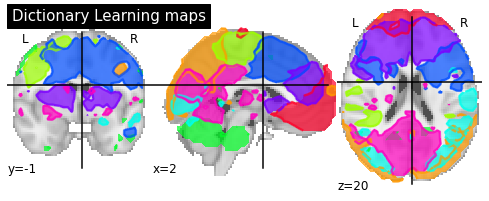

In [26]:
# Import dictionary learning algorithm from decomposition module and call the
# object and fit the model to the functional datasets
from nilearn.decomposition import DictLearning

# Initialize DictLearning object
dict_learn = DictLearning(n_components=8, smoothing_fwhm=6.,
                          memory="nilearn_cache", memory_level=2,
                          random_state=0)
# Fit to the data
dict_learn.fit(func_filenames)
# Resting state networks/maps in attribute `components_img_`
# Note that this attribute is implemented from version 0.4.1.
# For older versions, see the note section above for details.
components_img = dict_learn.components_img_

# Visualization of functional networks
# Show networks using plotting utilities
from nilearn import plotting

plotting.plot_prob_atlas(components_img, view_type='filled_contours',
                         title='Dictionary Learning maps')

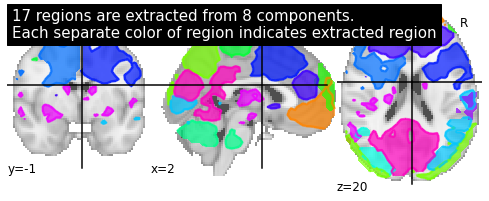

In [27]:
# Import Region Extractor algorithm from regions module
# threshold=0.5 indicates that we keep nominal of amount nonzero voxels across all
# maps, less the threshold means that more intense non-voxels will be survived.
from nilearn.regions import RegionExtractor

extractor = RegionExtractor(components_img, threshold=0.5,
                            thresholding_strategy='ratio_n_voxels',
                            extractor='local_regions',
                            standardize=True, min_region_size=1350)
# Just call fit() to process for regions extraction
extractor.fit()
# Extracted regions are stored in regions_img_
regions_extracted_img = extractor.regions_img_
# Each region index is stored in index_
regions_index = extractor.index_
# Total number of regions extracted
n_regions_extracted = regions_extracted_img.shape[-1]

# Visualization of region extraction results
title = ('%d regions are extracted from %d components.'
         '\nEach separate color of region indicates extracted region'
         % (n_regions_extracted, 8))
plotting.plot_prob_atlas(regions_extracted_img, view_type='filled_contours',
                         title=title)


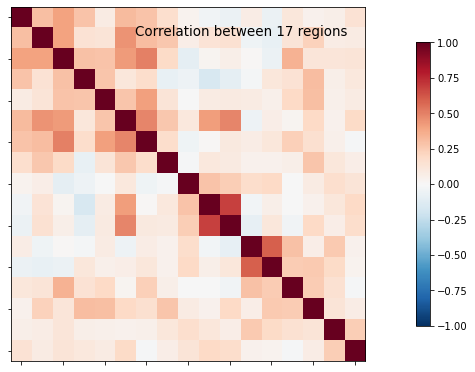

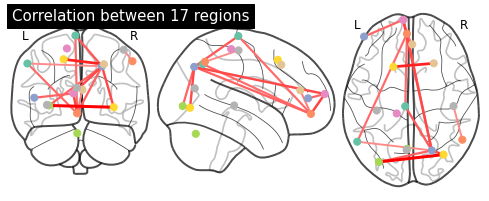

In [28]:
from nilearn.connectome import ConnectivityMeasure

correlations = []
# Initializing ConnectivityMeasure object with kind='correlation'
connectome_measure = ConnectivityMeasure(kind='correlation')
for filename, confound in zip(func_filenames, confounds):
    # call transform from RegionExtractor object to extract timeseries signals
    timeseries_each_subject = extractor.transform(filename, confounds=confound)
    # call fit_transform from ConnectivityMeasure object
    correlation = connectome_measure.fit_transform([timeseries_each_subject])
    # saving each subject correlation to correlations
    correlations.append(correlation)

# Mean of all correlations
import numpy as np
mean_correlations = np.mean(correlations, axis=0).reshape(n_regions_extracted,
                                                          n_regions_extracted)


title = 'Correlation between %d regions' % n_regions_extracted

# First plot the matrix
display = plotting.plot_matrix(mean_correlations, vmax=1, vmin=-1,
                               colorbar=True, title=title)

# Then find the center of the regions and plot a connectome
regions_img = regions_extracted_img
coords_connectome = plotting.find_probabilistic_atlas_cut_coords(regions_img)

plotting.plot_connectome(mean_correlations, coords_connectome,
                         edge_threshold='90%', title=title)

# Submission Part

In [29]:
from sklearn.svm import SVR
from sklearn.model_selection import KFold

def metric(y_true, y_pred):
    return np.mean(np.sum(np.abs(y_true - y_pred), axis=0)/np.sum(y_true, axis=0))



In [30]:
fnc_df.shape

(11754, 1379)

In [31]:
df = fnc_df.merge(loading_data, on="Id")
df.head()

Id  SCN(53)_vs_SCN(69)  SCN(98)_vs_SCN(69)  SCN(99)_vs_SCN(69)  \
0  10001            0.368580            0.166876            0.438148   
1  10002            0.151696           -0.024819            0.217504   
2  10003            0.343415            0.109974            0.741641   
3  10004            0.132793            0.258255            0.490769   
4  10005            0.291921            0.251254            0.416470   

   SCN(45)_vs_SCN(69)  ADN(21)_vs_SCN(69)  ADN(56)_vs_SCN(69)  \
0            0.341007           -0.186251            0.049096   
1            0.418072           -0.227234           -0.064052   
2            0.578558           -0.676446           -0.436960   
3            0.342717            0.091112            0.107969   
4            0.511719           -0.362626           -0.164710   

   SMN(3)_vs_SCN(69)  SMN(9)_vs_SCN(69)  SMN(2)_vs_SCN(69)  ...     IC_08  \
0           0.121417          -0.174268          -0.231578  ...  0.018246   
1          -0.143832          -0.118116          -0.054825  ...  0.014635   
2          -0.295663          -0.377790          -0.344963  ...  0.019565   
3           0.029220          -0.026237           0.094742  ...  0.002658   
4          -0.289059          -0.015537          -0.087316  ...  0.009702   

      IC_03     IC_21     IC_28     IC_11     IC_20     IC_30     IC_22  \
0  0.023711  0.009177 -0.013929  0.030696  0.010496  0.002892 -0.023235   
1  0.022556  0.012004 -0.011814  0.022479  0.005739  0.002880 -0.016609   
2  0.030616  0.018184 -0.010469  0.029799  0.015435  0.005211 -0.028882   
3  0.022266  0.005956 -0.010595  0.024078 -0.000319  0.005866 -0.015182   
4  0.017257  0.005454 -0.008591  0.019416  0.000786  0.002692 -0.019814   

      IC_29     IC_14  
0  0.022177  0.017192  
1  0.025543  0.014524  
2  0.031427  0.018164  
3  0.024476  0.014760  
4  0.017105  0.013316  

[5 rows x 1405 columns]

In [32]:
train_score = pd.read_csv("../input/trends-assessment-prediction/train_scores.csv")
train_score.head()

Id        age  domain1_var1  domain1_var2  domain2_var1  domain2_var2
0  10001  57.436077     30.571975     62.553736     53.325130     51.427998
1  10002  59.580851     50.969456     67.470628     60.651856     58.311361
2  10004  71.413018     53.152498     58.012103     52.418389     62.536641
3  10005  66.532630           NaN           NaN     52.108977     69.993075
4  10007  38.617381     49.197021     65.674285     40.151376     34.096421

In [33]:
train_score["is_train"] = True
df = df.merge(train_score, on="Id", how="left")
df.head()

Id  SCN(53)_vs_SCN(69)  SCN(98)_vs_SCN(69)  SCN(99)_vs_SCN(69)  \
0  10001            0.368580            0.166876            0.438148   
1  10002            0.151696           -0.024819            0.217504   
2  10003            0.343415            0.109974            0.741641   
3  10004            0.132793            0.258255            0.490769   
4  10005            0.291921            0.251254            0.416470   

   SCN(45)_vs_SCN(69)  ADN(21)_vs_SCN(69)  ADN(56)_vs_SCN(69)  \
0            0.341007           -0.186251            0.049096   
1            0.418072           -0.227234           -0.064052   
2            0.578558           -0.676446           -0.436960   
3            0.342717            0.091112            0.107969   
4            0.511719           -0.362626           -0.164710   

   SMN(3)_vs_SCN(69)  SMN(9)_vs_SCN(69)  SMN(2)_vs_SCN(69)  ...     IC_30  \
0           0.121417          -0.174268          -0.231578  ...  0.002892   
1          -0.143832          -0.118116          -0.054825  ...  0.002880   
2          -0.295663          -0.377790          -0.344963  ...  0.005211   
3           0.029220          -0.026237           0.094742  ...  0.005866   
4          -0.289059          -0.015537          -0.087316  ...  0.002692   

      IC_22     IC_29     IC_14        age  domain1_var1  domain1_var2  \
0 -0.023235  0.022177  0.017192  57.436077     30.571975     62.553736   
1 -0.016609  0.025543  0.014524  59.580851     50.969456     67.470628   
2 -0.028882  0.031427  0.018164        NaN           NaN           NaN   
3 -0.015182  0.024476  0.014760  71.413018     53.152498     58.012103   
4 -0.019814  0.017105  0.013316  66.532630           NaN           NaN   

   domain2_var1  domain2_var2  is_train  
0     53.325130     51.427998      True  
1     60.651856     58.311361      True  
2           NaN           NaN       NaN  
3     52.418389     62.536641      True  
4     52.108977     69.993075      True  

[5 rows x 1411 columns]

In [34]:
test_df = df[df["is_train"] != True].copy()
df = df[df["is_train"] == True].copy()

df.shape, test_df.shape

((5877, 1411), (5877, 1411))

In [35]:
fnc_features, loading_features = list(fnc_df.columns[1:]), list(loading_data.columns[1:])

# Giving less importance to FNC features since they are easier to overfit due to high dimensionality.
FNC_SCALE = 1/500

df[fnc_features] *= FNC_SCALE
test_df[fnc_features] *= FNC_SCALE

In [36]:
%%time
NUM_FOLDS = 7
kf = KFold(n_splits=NUM_FOLDS, shuffle=True, random_state=0)


features = loading_features + fnc_features

overal_score = 0
for target, c, w in [("age", 100, 0.3), ("domain1_var1", 10, 0.175), ("domain1_var2", 10, 0.175), ("domain2_var1", 10, 0.175), ("domain2_var2", 10, 0.175)]:    
    y_oof = np.zeros(df.shape[0])
    y_test = np.zeros((test_df.shape[0], NUM_FOLDS))
    
    for f, (train_ind, val_ind) in enumerate(kf.split(df, df)):
        train_df, val_df = df.iloc[train_ind], df.iloc[val_ind]
        train_df = train_df[train_df[target].notnull()]

        model = SVR(C=c, cache_size=3000.0)
        model.fit(train_df[features], train_df[target])

        y_oof[val_ind] = model.predict(val_df[features])
        y_test[:, f] = model.predict(test_df[features])
        
    df["pred_{}".format(target)] = y_oof
    test_df[target] = y_test.mean(axis=1)
    score = metric(df[df[target].notnull()][target].values, df[df[target].notnull()]["pred_{}".format(target)].values)
    overal_score += w*score
    print(target, np.round(score, 4))
    print()
    
print("Overal score:", np.round(overal_score, 4))

age 0.1445

domain1_var1 0.1512

domain1_var2 0.1512

domain2_var1 0.1818

domain2_var2 0.1761

Overal score: 0.1589
CPU times: user 1h 6min 26s, sys: 7.89 s, total: 1h 6min 34s
Wall time: 1h 7min 9s


In [37]:
sub_df = pd.melt(test_df[["Id", "age", "domain1_var1", "domain1_var2", "domain2_var1", "domain2_var2"]], id_vars=["Id"], value_name="Predicted")
sub_df["Id"] = sub_df["Id"].astype("str") + "_" +  sub_df["variable"].astype("str")

sub_df = sub_df.drop("variable", axis=1).sort_values("Id")
assert sub_df.shape[0] == test_df.shape[0]*5
sub_df.head(10)

Id  Predicted
0               10003_age  52.519645
5877   10003_domain1_var1  50.392714
11754  10003_domain1_var2  61.387698
17631  10003_domain2_var1  48.233735
23508  10003_domain2_var2  57.780922
1               10006_age  65.747251
5878   10006_domain1_var1  54.670994
11755  10006_domain1_var2  59.902875
17632  10006_domain2_var1  50.273231
23509  10006_domain2_var2  51.983598

In [38]:
sub_df.to_csv("submission.csv", index=False)

# Work in Progress , kindly Upvote if you like the notebook ❤

### <span style="color:Blue">What you are understanding and what is the possibility regarding Neuroimaging and Neuromorphic Computing, kindly comment below to share your knowledge :-)

**Thanks Again for going through the Kernel ♡**